In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv

In [3]:
import sys

In [4]:
sys.path.append('/u/wangnisn/devel/Machine_learning_dynamics/bayesian')

In [5]:
steps = np.arange(0,2001,100)

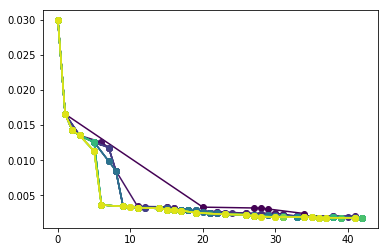

In [6]:
data0 = []
folder = 'run1'
for step in steps:
    data0.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.viridis
for i in np.arange(len(data0)):
    color=cmap(i / len(data0))
    dd = data0[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)

In [7]:
steps = np.arange(0,2001,100)

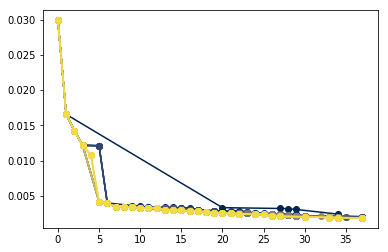

In [8]:
data1 = []
folder = 'run2'
for step in steps:
    data1.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.cividis
for i in np.arange(len(data1)):
    color=cmap(i / len(data1))
    dd = data1[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)

In [9]:
steps = np.arange(0,901,100)

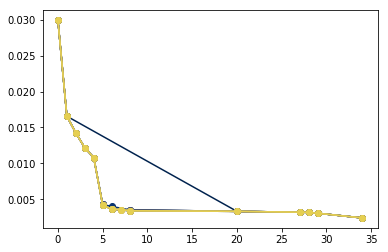

In [10]:
data2 = []
folder = 'run3'
for step in steps:
    data2.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.cividis
for i in np.arange(len(data2)):
    color=cmap(i / len(data2))
    dd = data2[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)

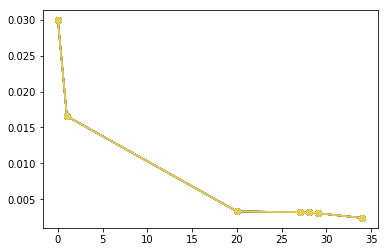

In [11]:
data3 = []
folder = 'run4'
for step in steps:
    data3.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.cividis
for i in np.arange(len(data3)):
    color=cmap(i / len(data3))
    dd = data3[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)
#plt.ylim(10,20)

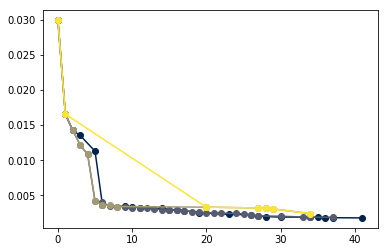

In [12]:
cmap = mpl.cm.cividis
plt.plot(data0[-1].values[:,0],data0[-1].values[:,1] ,'-o',color=cmap(0))
plt.plot(data1[-1].values[:,0],data1[-1].values[:,1] ,'-o',color=cmap(0.33))
plt.plot(data2[-1].values[:,0],data2[-1].values[:,1] ,'-o',color=cmap(0.66))
plt.plot(data3[-1].values[:,0],data3[-1].values[:,1] ,'-o',color=cmap(0.99))

In [13]:
from get_pareto import ParetoSet

In [14]:
pareto_set = ParetoSet()

In [15]:
from get_pareto import ParetoSet, ParetoPoint
from sympy.parsing.sympy_parser import parse_expr
import copy
def csv_add_to_pareto(csv_file, pareto_set=ParetoSet(), header_line=1):
    """
    csv_file.............string, filename of the the csv_file.
                         Format: 
                         first column: x;  second column: y; third column: str or sympy expression. 
    pareto_set...........object of the class ParetoSet. new points will be added into it.
                         Default: an empty Pareto Set. It means that if no pareto_set is inputed, 
                         an empty Pareto Set will be first created, and then the points will be added into it. 
    header_line..........int, number of header lines. Default: 1
    
    return: the new pareto_set which the points in csv_file are added into.
    """
    
    if not isinstance(pareto_set, ParetoSet):
        raise TypeError('pareto_set must be an instance of ', ParetoSet)
    pareto = copy.deepcopy(pareto_set)
    with open(csv_file, newline='') as csv_inf:
        csv_reader = csv.reader(csv_inf )
        for i,row in enumerate(csv_reader):
            if i < header_line:
                continue
            point = ParetoPoint(x=float(row[0]),y=float(row[1]),data=parse_expr(row[2]))
            pareto.add(point)
    return pareto
                

In [16]:
pareto_set = csv_add_to_pareto('run1/pareto_set@2000.csv')
pareto_set = csv_add_to_pareto('run2/pareto_set@2000.csv',pareto_set)
pareto_set = csv_add_to_pareto('run3/pareto_set@2000.csv', pareto_set)
pareto_set = csv_add_to_pareto('run4/pareto_set@1000.csv', pareto_set)

In [17]:
array = pareto_set.to_array()

Text(0, 0.5, 'MAE')

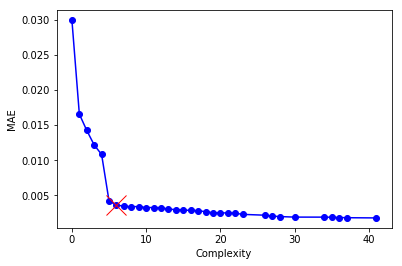

In [18]:
plt.plot(array[:,0], array[:,1],'-bo')
plt.plot( [pareto_set[6].x], [pareto_set[6].y], 'x', markersize=20, linewidth=8,color='r')
plt.xlabel('Complexity')
plt.ylabel('MAE')

In [70]:
pareto_set[0].data

0

In [71]:
pareto_set[1].data

-4.04239366878262*u_x

In [72]:
pareto_set[2].data

-4.05393432158216*u_x - 16.5231963792615*u_xx

In [73]:
pareto_set[3].data

5.74763746260607*u*u_x - 6.80701132443493*u_x

In [74]:
pareto_set[4].data

0.453777039310052*u**2 - 0.433386440551802*u - 16.1511386652119*u_xx

In [75]:
pareto_set[5].data

-0.365149458465565*u**4 + 1.05388646669642*u**2 - 0.688158646957545*u

In [76]:
pareto_set[6].data

-0.881850230978038*u**3 + 1.7209435185508*u**2 - 0.837484388824671*u + 8.89035230350701*u_xx

In [77]:
pareto_set[7].data

-0.8616789096817*u**3 + 1.68479453985802*u**2 - 0.818870491382493*u + 9.09129246430489*u_xx - 0.00231633990351021

In [79]:
pareto_set[8].data

-0.86082276493346*u**3 + 1.64338283506603*u**2 - 0.778860630292952*u - 0.458217845298993*u_x + 9.39087849695297*u_xx - 0.0023122014143418

In [80]:
pareto_set.save_csv('summary.csv')

In [81]:
dataset = pd.read_csv('summary.csv')

In [82]:
dataset.columns = ['Complexity','CV_MAE', 'Expression']

In [83]:
pd.set_option('display.width', 2000)
dataset

,Complexity,CV_MAE,Expression
0,0.0,0.029921,0
1,1.0,0.016564,-4.04239366878262*u_x
2,2.0,0.014239,-4.05393432158216*u_x - 16.5231963792615*u_xx
3,3.0,0.012172,5.74763746260607*u*u_x - 6.80701132443493*u_x
4,4.0,0.010815,0.453777039310052*u**2 - 0.433386440551802*u -...
5,5.0,0.004193,-0.365149458465565*u**4 + 1.05388646669642*u**...
6,6.0,0.003637,-0.881850230978038*u**3 + 1.7209435185508*u**2...
7,7.0,0.003439,-0.8616789096817*u**3 + 1.68479453985802*u**2 ...
8,8.0,0.003399,-0.86082276493346*u**3 + 1.64338283506603*u**2...
9,9.0,0.003394,-0.85682843733552*u**3 + 1.65916356797319*u**2...


In [84]:
dataset.to_csv('summary.csv',index=None)

Text(0, 0.5, 'MAE')

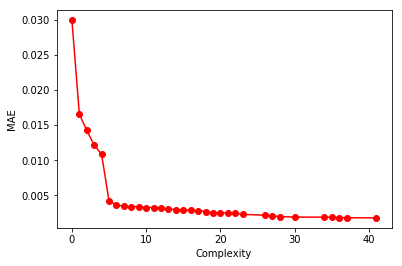

In [85]:
plt.plot(array[:,0], array[:,1],'-ro')
plt.xlabel('Complexity')
plt.ylabel('MAE')

In [86]:
pareto_set[0].data

0

In [87]:
pareto_set[1].data

-4.04239366878262*u_x

In [88]:
pareto_set[2].data

-4.05393432158216*u_x - 16.5231963792615*u_xx

In [89]:
pareto_set[3].data

5.74763746260607*u*u_x - 6.80701132443493*u_x

In [90]:
pareto_set[4].data

0.453777039310052*u**2 - 0.433386440551802*u - 16.1511386652119*u_xx

In [91]:
pareto_set[5].data

-0.365149458465565*u**4 + 1.05388646669642*u**2 - 0.688158646957545*u

In [93]:
pareto_set[6].data

-0.881850230978038*u**3 + 1.7209435185508*u**2 - 0.837484388824671*u + 8.89035230350701*u_xx

In [26]:
pareto_df= pd.read_csv('for_WeiYe.csv')

In [27]:
pareto_df

,Complexity,CV_MAE,Expression
0,0.0,32.543843,0
1,1.0,13.826894,0.000384668003051128*Fe**2*Mn
2,2.0,11.801982,1.79505413772828e-5*Fe**3 + 0.0002934988756505...
3,3.0,10.848263,16.3689422190183*C + 0.000520430255007147*Fe**...
4,4.0,10.222712,0.0115587486654245*C*Fe*Mn + 0.000373368927707...
5,5.0,9.757567,1.62858196079104*Al*Sl + 0.0149901398323958*C*...
6,6.0,9.510192,1.80014990387565*Al*Sl + 0.00809221022328773*C...
7,7.0,9.346075,-0.120923231626255*Al**2 + 1.58517180094*Al*Sl...
8,8.0,9.133944,-0.00569235847144246*Al**2*Mn - 0.062526957372...
9,9.0,8.865691,-0.0439441935891237*Al*Mn + 0.80908509176566*A...


In [28]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('/u/wangnisn/devel/Machine_learning_dynamics/data/Composition_energy_3.csv')

In [29]:
train_df

,C,Mn,Al,Si,Fe,Energy,new_energy
0,0.6000,12.00,0.000,0.000,87.4000,22.908000,36.652800
1,0.3000,12.00,3.000,0.000,84.7000,43.670160,65.239876
2,0.0500,6.15,0.000,1.500,92.3000,20.280000,24.459640
3,0.1500,6.00,3.000,1.500,89.3500,32.700800,50.073556
4,0.3000,6.00,3.000,1.500,89.2000,53.703000,63.663692
5,0.3000,10.00,3.000,2.000,84.7000,71.635200,71.635200
6,0.4000,10.00,3.000,2.000,84.6000,31.487600,46.856392
7,0.5000,10.00,3.000,2.000,84.5000,36.277920,41.453903
8,0.1200,4.60,1.100,0.550,93.6300,15.531600,15.531600
9,0.1200,5.80,3.100,0.470,90.5100,26.230080,41.968128


In [30]:
test_df

,C,Mn,Al,Si,Fe
0,0.20,7.21,2.99,0.03,89.57
1,0.20,7.21,2.99,0.03,89.57
2,0.20,7.21,2.99,0.03,89.57
3,0.20,7.21,2.99,0.03,89.57
4,0.20,7.21,2.99,0.03,89.57
5,0.20,7.21,2.99,0.03,89.57
6,0.20,7.21,2.99,0.03,89.57
7,0.20,7.21,2.99,0.03,89.57
8,0.20,7.21,2.99,0.03,89.57
9,0.19,10.41,2.85,0.02,86.53


In [31]:
from sympy import lambdify

In [32]:
import sympy

In [33]:
C, Mn, Al, Sl, Fe = sympy.symbols('C Mn Al Sl Fe')

In [34]:
len(train_df)

322

In [35]:
def evaluate_pareto(data_df, pareto_df):
    prediction = np.zeros((len(data_df.index), len(pareto_df)))
    for index, row in pareto_df.iterrows():
        expr = parse_expr(row[-1])
        energy = lambdify( (C, Mn, Al, Sl, Fe), expr)
        for i in data_df.index:
            prediction[i, index] = energy(data_df.values[i,0],data_df.values[i,1],data_df.values[i,2],data_df.values[i,3],data_df.values[i,4])
    return prediction

In [46]:
y_train = train_df.values[:,-2]
prediction = evaluate_pareto(train_df, pareto_df)
shape = prediction.shape
mae_all = []
for i in range(shape[1]):
    mae_all.append(np.mean((np.abs(prediction[:,i]-y_train))))

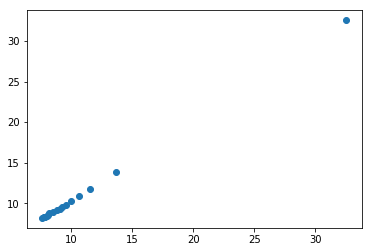

In [47]:
plt.scatter(mae_all, pareto_df['CV_MAE'])

In [48]:
test_df

,C,Mn,Al,Si,Fe,model_0,model_1,model_2,model_3,model_4,...,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14,model_15,model_16
0,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
1,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
2,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
3,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
4,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
5,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
6,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
7,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
8,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
9,0.19,10.41,2.85,0.02,86.53,0.0,29.982663,34.506498,37.327196,36.538777,...,35.325641,35.600721,36.154804,34.933847,34.830471,41.324802,38.724534,39.526206,41.519638,40.149978


In [49]:
prediction_test = evaluate_pareto(test_df, pareto_df)

In [50]:
prediction_test.shape

(38, 17)

In [51]:
shape = prediction_test.shape
for model_index in range(0,shape[1]):
    name = 'model_'+str(model_index)
    test_df[name] = prediction_test[:,model_index]

In [52]:
test_df

,C,Mn,Al,Si,Fe,model_0,model_1,model_2,model_3,model_4,...,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14,model_15,model_16
0,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
1,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
2,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
3,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
4,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
5,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
6,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
7,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
8,0.20,7.21,2.99,0.03,89.57,0.0,22.250843,29.876505,30.225859,31.427576,...,29.632483,29.985317,32.220742,31.392132,31.858171,38.528391,35.285861,37.700859,38.653957,37.328675
9,0.19,10.41,2.85,0.02,86.53,0.0,29.982663,34.506498,37.327196,36.538777,...,35.325641,35.600721,36.154804,34.933847,34.830471,41.324802,38.724534,39.526206,41.519638,40.149978


In [53]:
test_df.to_csv('test_with_results.csv', index=None)